Nombre: Milton David Casnanzuela Teran

# Proyecto De Analisis Descriptivo
## 1. El Probelma a solucionar
### ¿Cómo han evolucionado las exportaciones de Ecuador hacia Estados Unidos en términos de valor y volumen en el tiempo y qué productos se exportan más?
## 2. Objetivos:
- Analizar las tendencias en las exportaciones de Ecuador a Estados Unidos durante el periodo de tiempo establecido.
- Identificar los productos ecuatorianos más exportados a Estados Unidos.
- Examinar la relación entre el valor y volumen de las exportaciones.
- Comparar las exportaciones petroleras y no petroleras, así como las tradicionales y no tradicionales.


##Paso 1: Importar las bibliotecas necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Paso 2: Cargar tus datos

In [ ]:
df = pd.read_csv('/content/mpceip_deeco_exportaciones_eeuu_2023_02.csv')

## Paso 3: Verificación inicial de los datos

In [ ]:
# Muestra las primeras filas del DataFrame
df.head()

,Año,Mes,País Destino,Capítulo,4D,Producto Principal (Nivel 4),6D,8D,Tradicional/No tradicional,No Petrolero/ Petrolero,Código Subpartida,Export FOB (miles),Toneladas
0,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060030,NO TRADICIONAL,No Petrolero,106003000,4.500,0.138
1,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060090,NO TRADICIONAL,No Petrolero,106009000,4.923,4.981
2,2001,1,ESTADOS UNIDOS,2,207,Carne_ Leche Y Elaborados,20712,2071200,NO TRADICIONAL,No Petrolero,207120000,79.913,40.089
3,2001,1,ESTADOS UNIDOS,2,208,Carne_ Leche Y Elaborados,20890,2089000,NO TRADICIONAL,No Petrolero,208900000,2.500,0.358
4,2001,1,ESTADOS UNIDOS,3,301,Animales Vivos No Para Alimentación,30110,3011000,NO TRADICIONAL,No Petrolero,301100000,3.532,4.782


In [ ]:
# Muestra información general sobre tus datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121413 entries, 0 to 121412
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Año                           121413 non-null  int64  
 1   Mes                           121413 non-null  int64  
 2   País Destino                  121413 non-null  object 
 3   Capítulo                      121413 non-null  int64  
 4   4D                            121413 non-null  int64  
 5   Producto Principal (Nivel 4)  121413 non-null  object 
 6   6D                            121413 non-null  int64  
 7   8D                            121413 non-null  int64  
 8   Tradicional/No tradicional    121413 non-null  object 
 9   No Petrolero/ Petrolero       121413 non-null  object 
 10  Código Subpartida             121413 non-null  int64  
 11  Export FOB (miles)            121413 non-null  float64
 12  Toneladas                     121413 non-nul

## Paso 4: Limpieza de los datos

Verificamos datos nulos

In [ ]:
df.isnull().sum()

Año                             0
Mes                             0
País Destino                    0
Capítulo                        0
4D                              0
Producto Principal (Nivel 4)    0
6D                              0
8D                              0
Tradicional/No tradicional      0
No Petrolero/ Petrolero         0
Código Subpartida               0
Export FOB (miles)              0
Toneladas                       0
dtype: int64

Eliminados columnas inesesarias.

In [ ]:
df = df.drop(['País Destino'],axis=1)

In [ ]:
# Estadísticas descriptivas básicas para las columnas numéricas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Año,121413.0,2.012953e+03,6.370737e+00,2001.0,2.008000e+03,2.014000e+03,2.018000e+03,2.023000e+03
Mes,121413.0,6.576849e+00,3.415733e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Capítulo,121413.0,4.619813e+01,3.228461e+01,1.0,1.500000e+01,4.400000e+01,8.300000e+01,9.800000e+01
4D,121413.0,4.631552e+03,3.234544e+03,101.0,1.511000e+03,4.418000e+03,8.302000e+03,9.808000e+03
6D,121413.0,4.631999e+05,3.234552e+05,10110.0,1.511100e+05,4.418900e+05,8.302500e+05,9.808600e+05
8D,121413.0,4.632002e+07,3.234552e+07,1011010.0,1.511100e+07,4.418909e+07,8.302500e+07,9.808600e+07
Código Subpartida,121413.0,4.632002e+09,3.234552e+09,101101000.0,1.511100e+09,4.418909e+09,8.302500e+09,9.808600e+09
Export FOB (miles),121413.0,1.177094e+03,1.885539e+04,0.0,6.650000e-01,5.800000e+00,5.192500e+01,9.544135e+05
Toneladas,121413.0,2.117077e+03,4.004755e+04,0.0,5.500000e-02,6.900000e-01,1.478500e+01,1.467933e+06


In [ ]:
df = df.fillna(0)


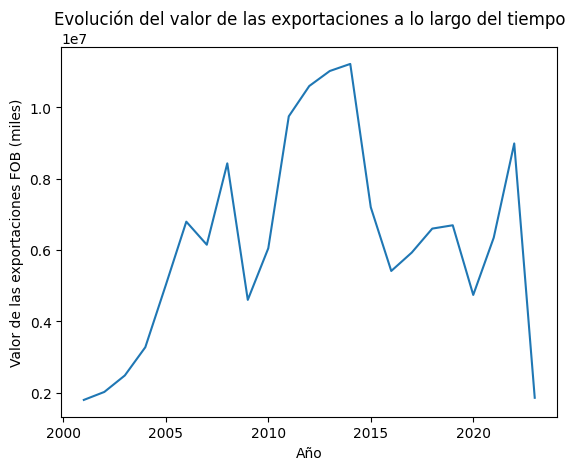

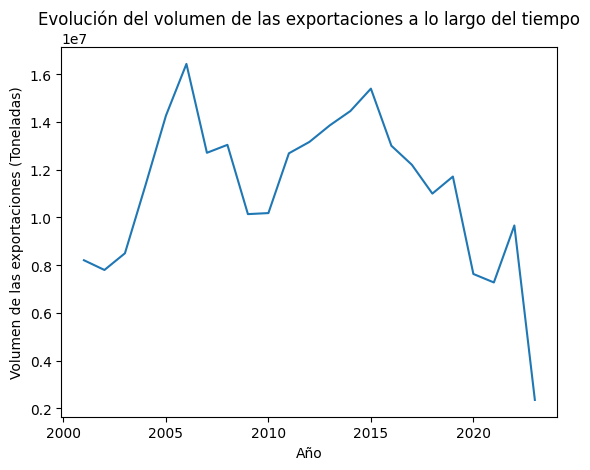

In [ ]:

# Calculamos la suma de las exportaciones FOB y de las toneladas por año
exportaciones_por_año = df.groupby('Año')[['Export FOB (miles)', 'Toneladas']].sum()

# Graficamos la evolución de las exportaciones FOB
exportaciones_por_año['Export FOB (miles)'].plot(kind='line')
plt.title('Evolución del valor de las exportaciones a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Valor de las exportaciones FOB (miles)')
plt.show()

# Graficamos la evolución de las toneladas exportadas
exportaciones_por_año['Toneladas'].plot(kind='line')
plt.title('Evolución del volumen de las exportaciones a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Volumen de las exportaciones (Toneladas)')
plt.show()


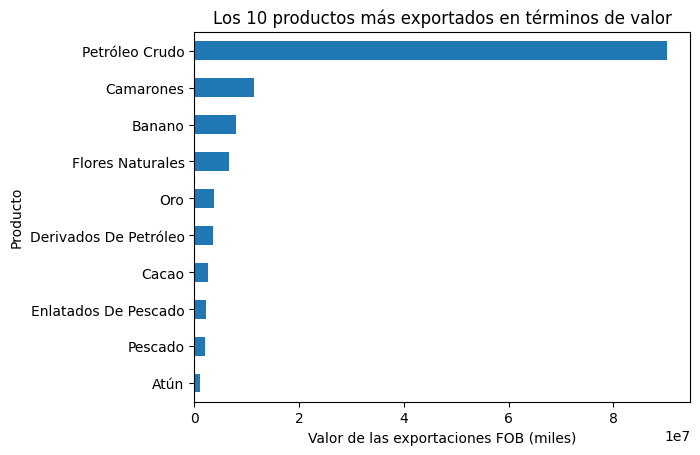

In [ ]:
# Calculamos la suma de las exportaciones FOB por producto
exportaciones_por_producto = df.groupby('Producto Principal (Nivel 4)')['Export FOB (miles)'].sum()

# Obtenemos los 10 productos con más exportaciones
top_productos = exportaciones_por_producto.nlargest(10)

# Graficamos los 10 productos más exportados
top_productos.plot(kind='barh')
plt.title('Los 10 productos más exportados en términos de valor')
plt.xlabel('Valor de las exportaciones FOB (miles)')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()


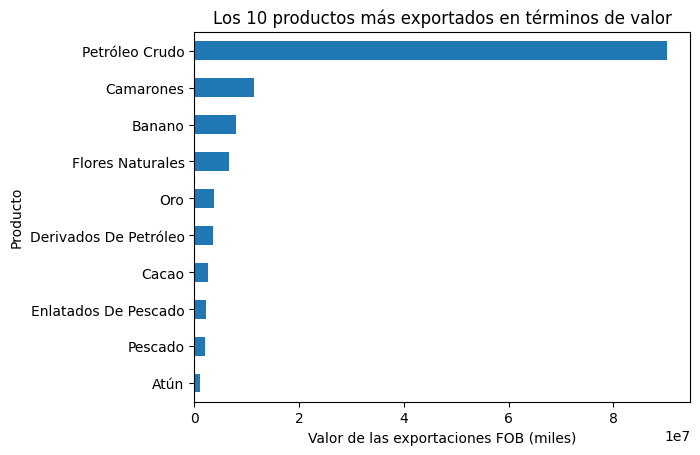

In [ ]:
# Calculamos la suma de las exportaciones FOB por producto
exportaciones_por_año = df.groupby('Producto Principal (Nivel 4)')['Toneladas'].sum()

# Obtenemos los 10 productos con más exportaciones
top_productos = exportaciones_por_producto.nlargest(10)

# Graficamos los 10 productos más exportados
top_productos.plot(kind='barh')
plt.title('Los 10 productos más exportados en términos de valor')
plt.xlabel('Valor de las exportaciones FOB (miles)')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df['Producto Principal (Nivel 4)'].nunique()

77

¿Cómo han variado las exportaciones a lo largo de los meses del año?

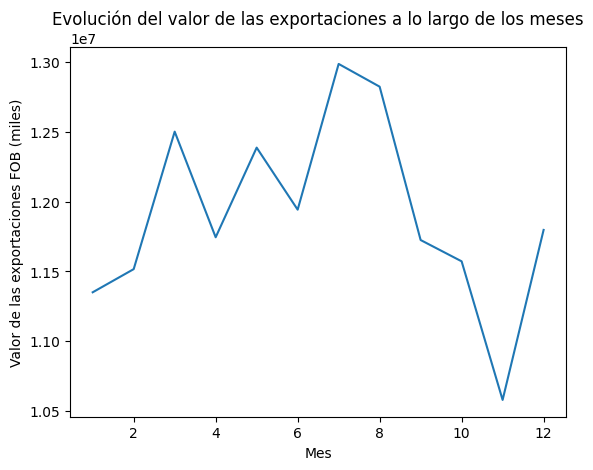

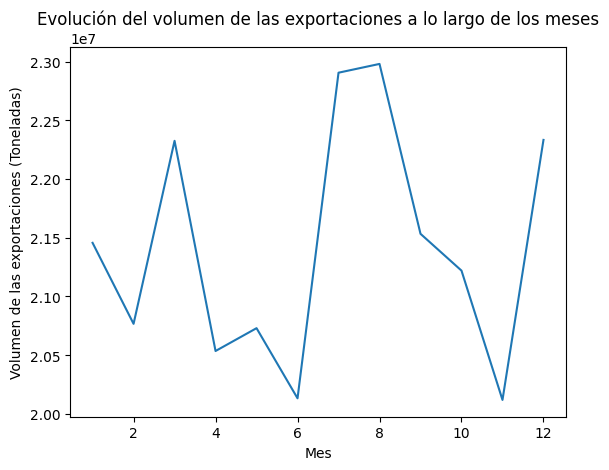

In [ ]:
# Calculamos la suma de las exportaciones FOB y de las toneladas por mes
exportaciones_por_mes = df.groupby('Mes')[['Export FOB (miles)', 'Toneladas']].sum()

# Graficamos la evolución de las exportaciones FOB
exportaciones_por_mes['Export FOB (miles)'].plot(kind='line')
plt.title('Evolución del valor de las exportaciones a lo largo de los meses')
plt.xlabel('Mes')
plt.ylabel('Valor de las exportaciones FOB (miles)')
plt.show()

# Graficamos la evolución de las toneladas exportadas
exportaciones_por_mes['Toneladas'].plot(kind='line')
plt.title('Evolución del volumen de las exportaciones a lo largo de los meses')
plt.xlabel('Mes')
plt.ylabel('Volumen de las exportaciones (Toneladas)')
plt.show()


<ipython-input-24-484f00bb5f3c>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exportaciones_por_producto_y_mes = df.groupby(['Producto Principal (Nivel 4)', 'Mes']).sum()


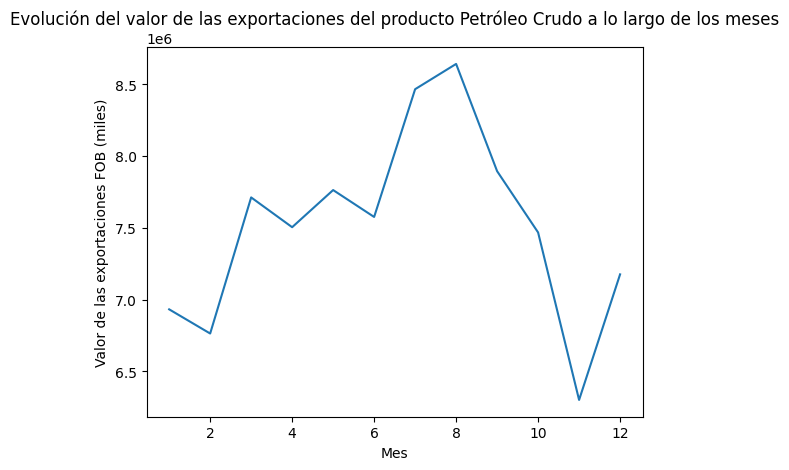

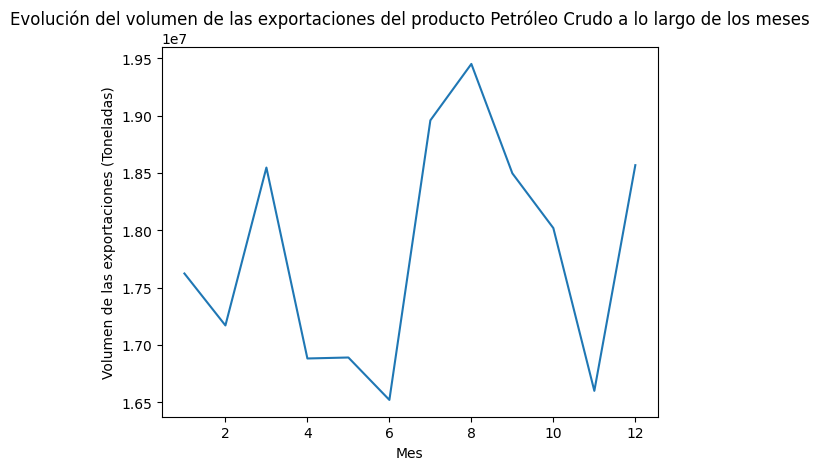

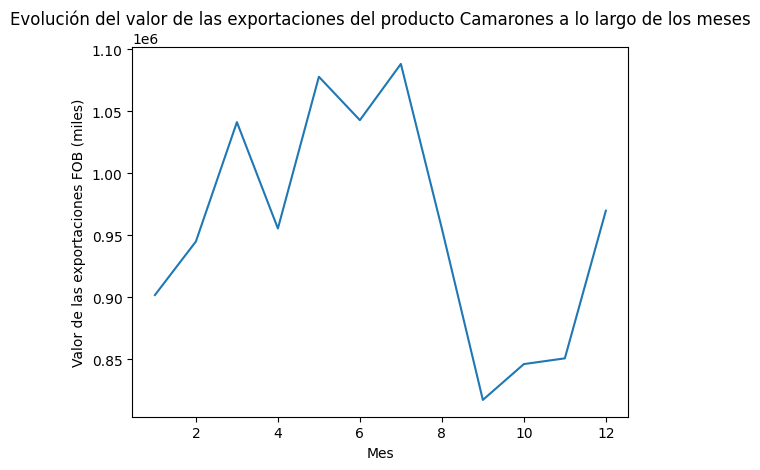

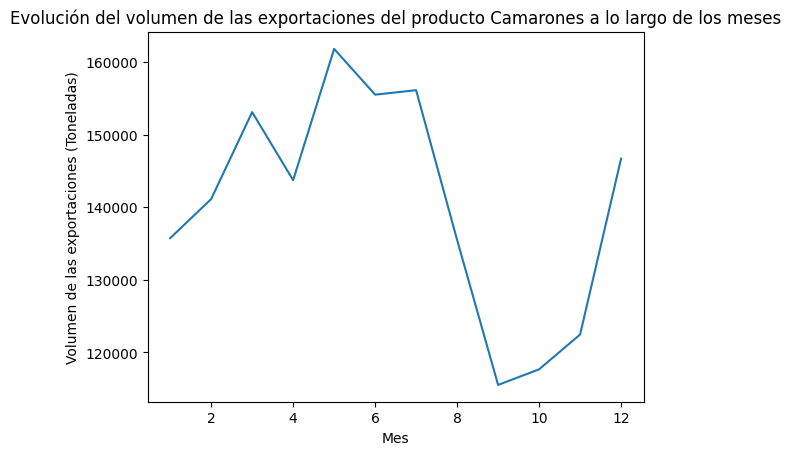

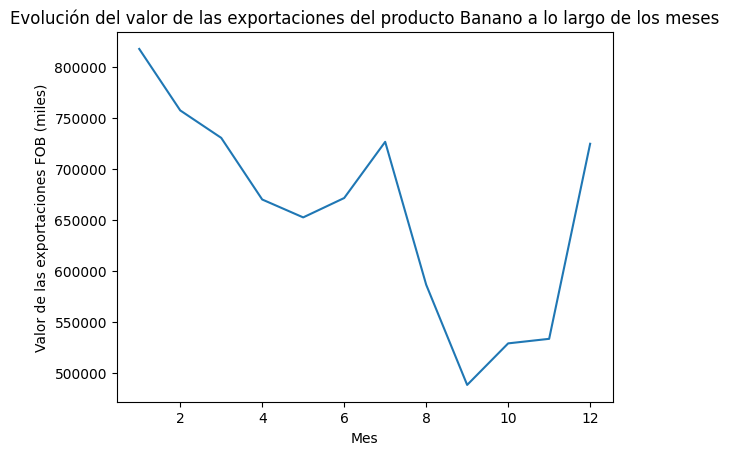

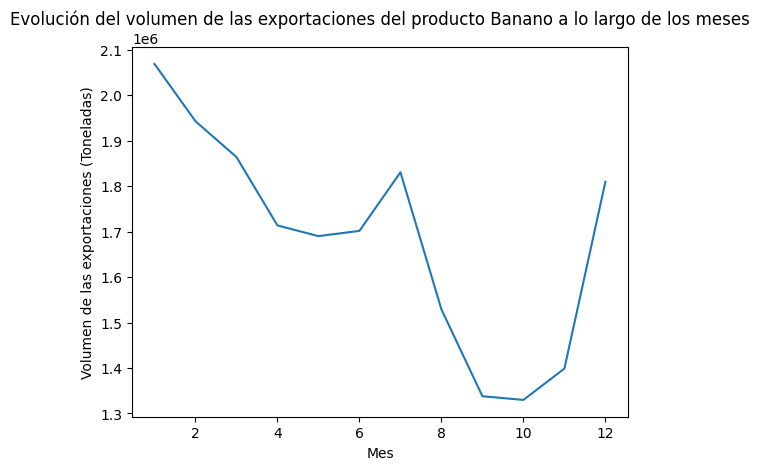

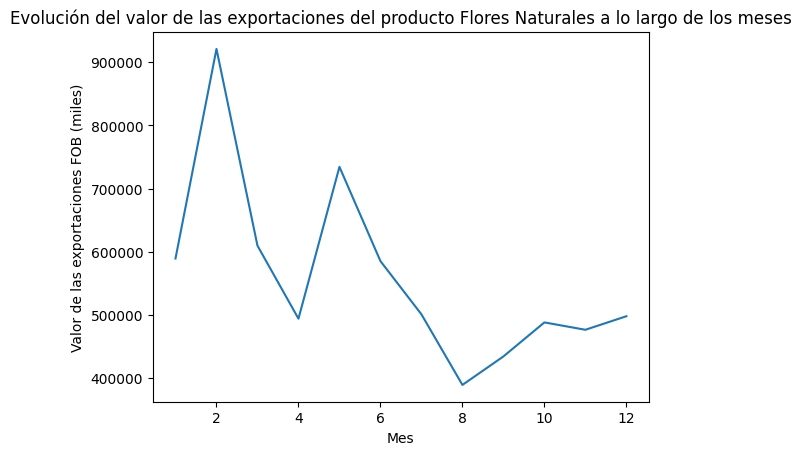

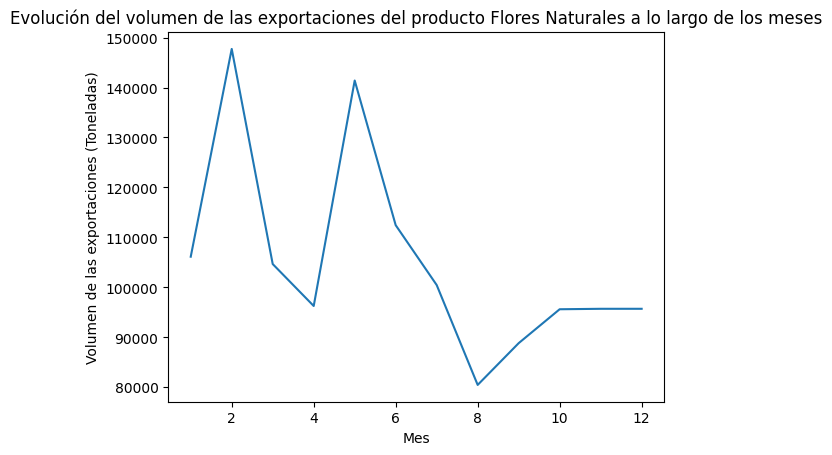

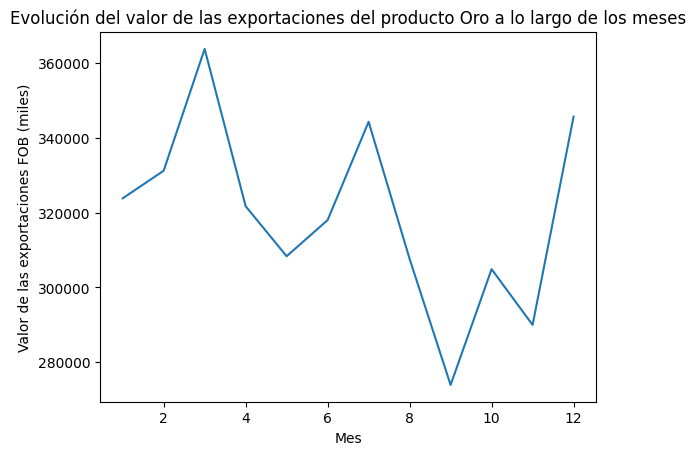

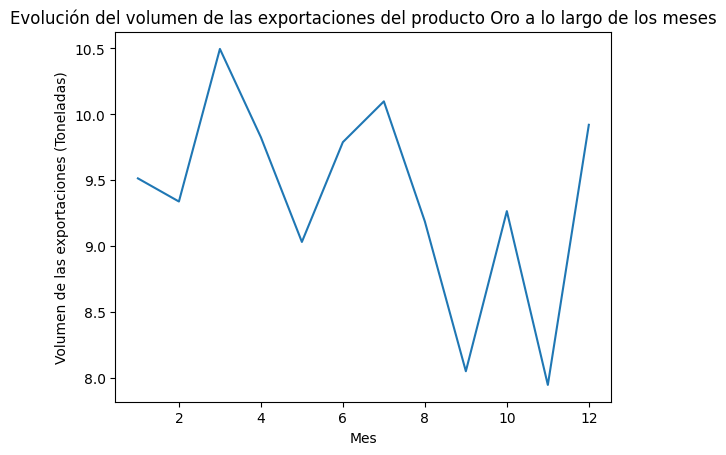

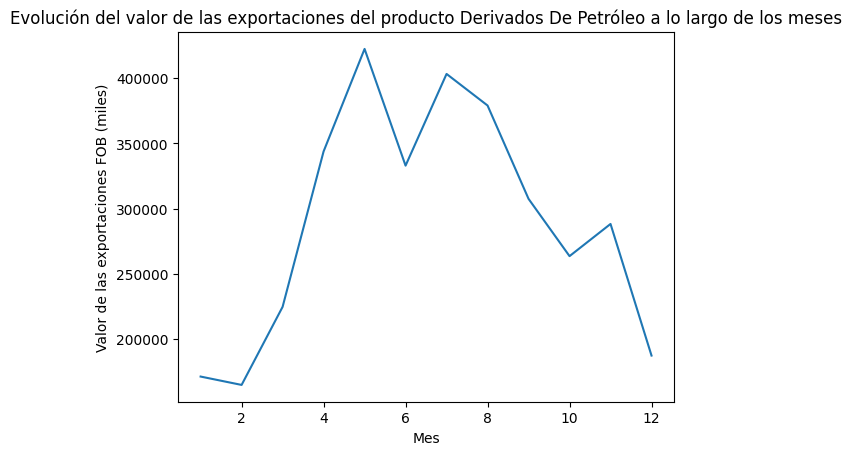

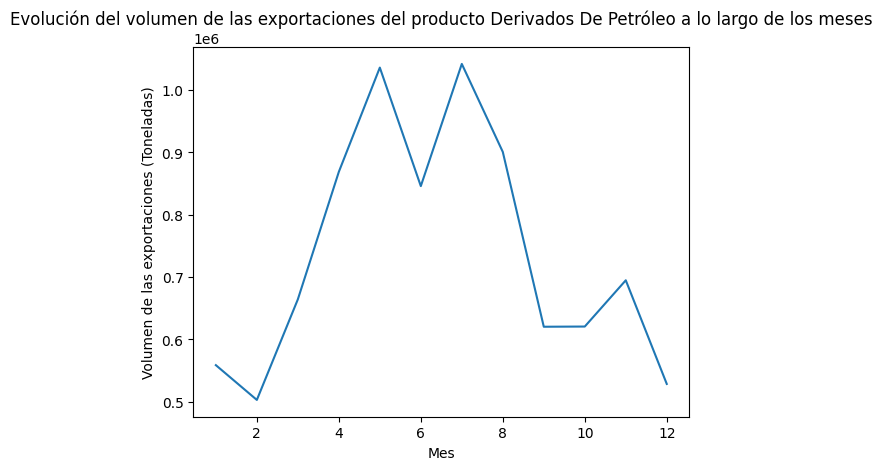

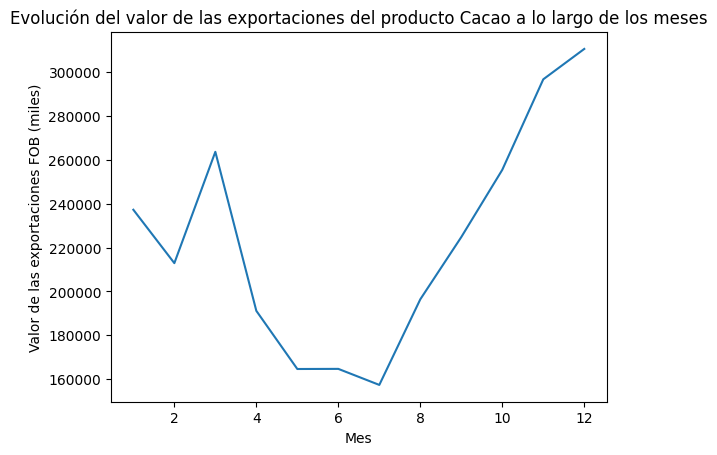

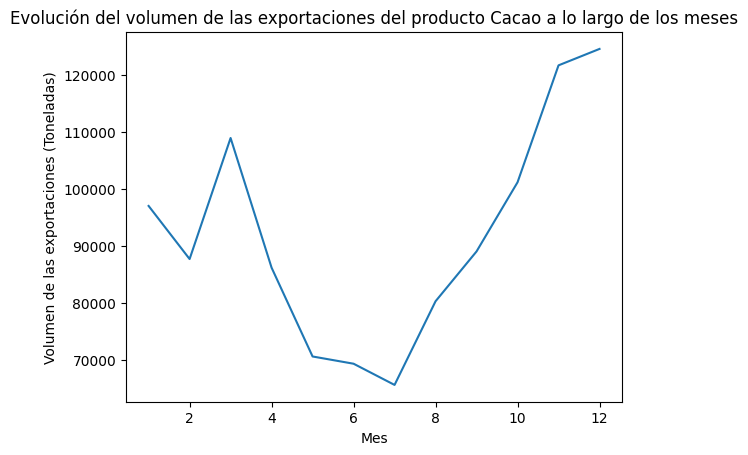

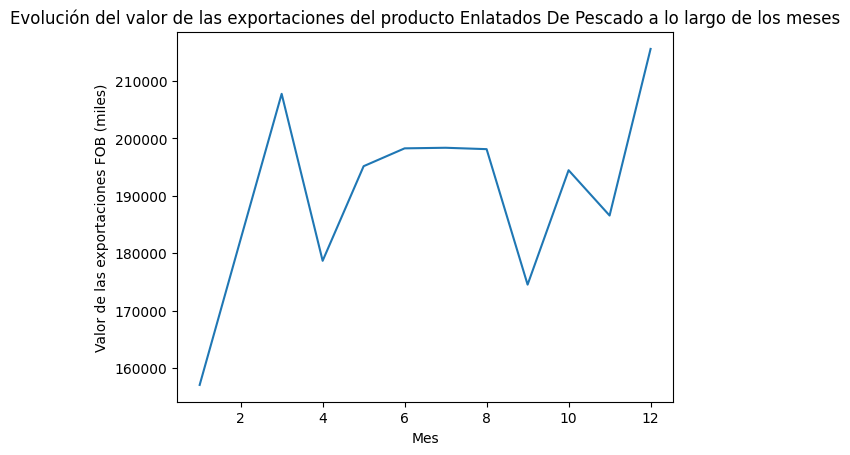

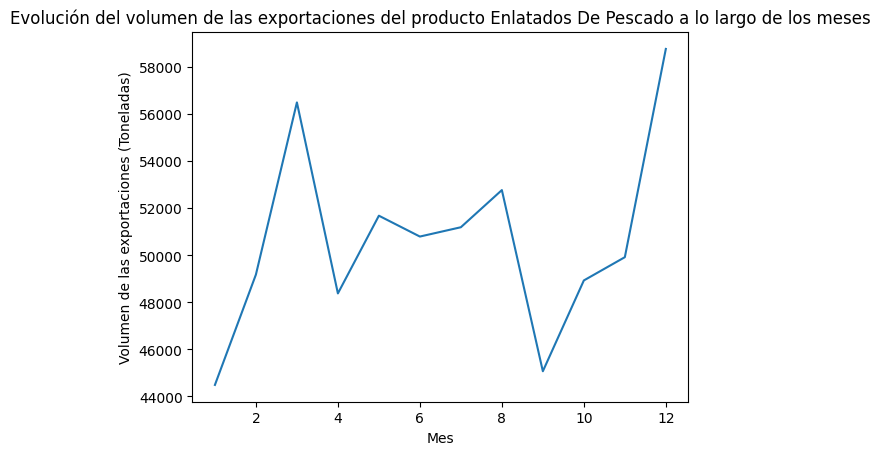

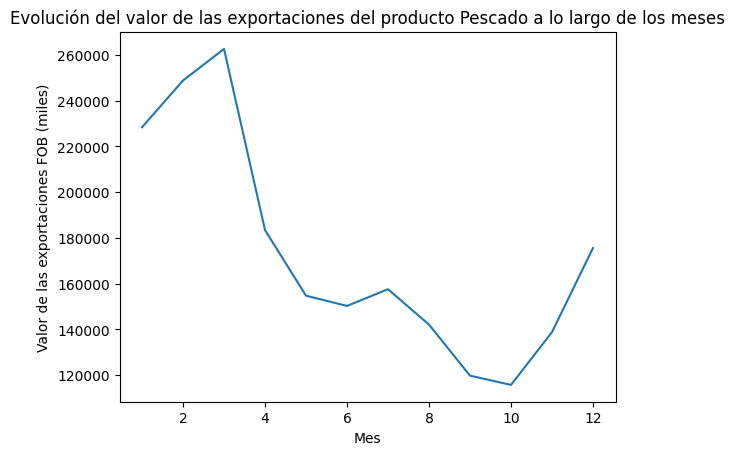

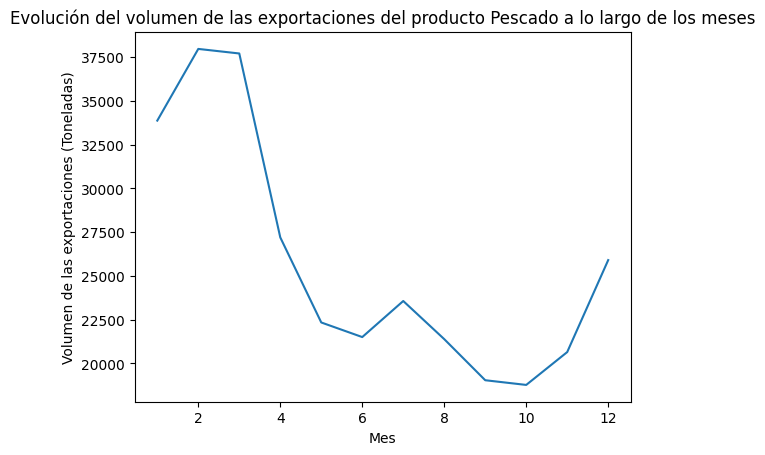

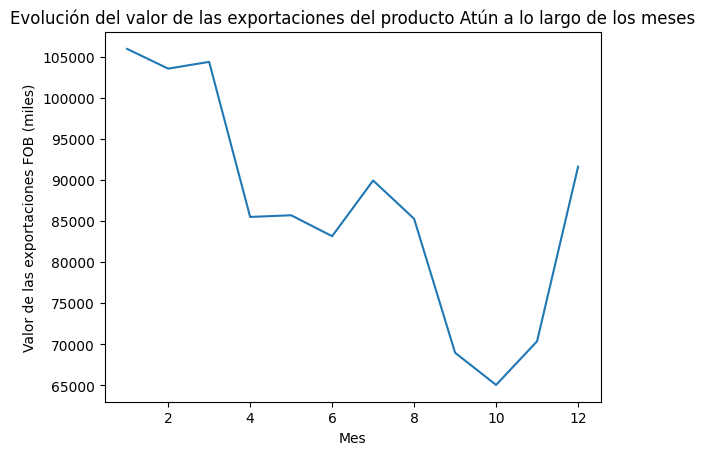

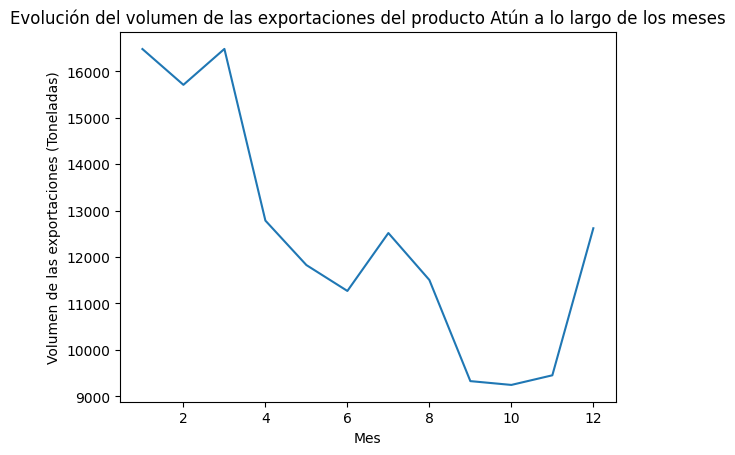

In [ ]:
# Calculamos la suma de las exportaciones FOB por producto
exportaciones_por_producto = df.groupby('Producto Principal (Nivel 4)')['Export FOB (miles)'].sum()

# Obtenemos los 10 productos con más exportaciones
top_productos = exportaciones_por_producto.nlargest(10).index

# Agrupamos los datos por producto y mes
exportaciones_por_producto_y_mes = df.groupby(['Producto Principal (Nivel 4)', 'Mes']).sum()

# Iteramos sobre estos productos y generamos gráficos para cada uno
for producto in top_productos:
    exportaciones_del_producto = exportaciones_por_producto_y_mes.loc[producto]

    # Graficamos la evolución de las exportaciones FOB del producto
    exportaciones_del_producto['Export FOB (miles)'].plot(kind='line')
    plt.title('Evolución del valor de las exportaciones del producto {} a lo largo de los meses'.format(producto))
    plt.xlabel('Mes')
    plt.ylabel('Valor de las exportaciones FOB (miles)')
    plt.show()

    # Graficamos la evolución de las toneladas exportadas del producto
    exportaciones_del_producto['Toneladas'].plot(kind='line')
    plt.title('Evolución del volumen de las exportaciones del producto {} a lo largo de los meses'.format(producto))
    plt.xlabel('Mes')
    plt.ylabel('Volumen de las exportaciones (Toneladas)')
    plt.show()


¿Existe una correlación entre el valor y el volumen de las exportaciones?

In [ ]:
# Calcular la correlación de Pearson entre 'Export FOB (miles)' y 'Toneladas'
correlacion = df['Export FOB (miles)'].corr(df['Toneladas'])

print('La correlación de Pearson entre el valor y el volumen de las exportaciones es: ', correlacion)


La correlación de Pearson entre el valor y el volumen de las exportaciones es:  0.9133938840153103


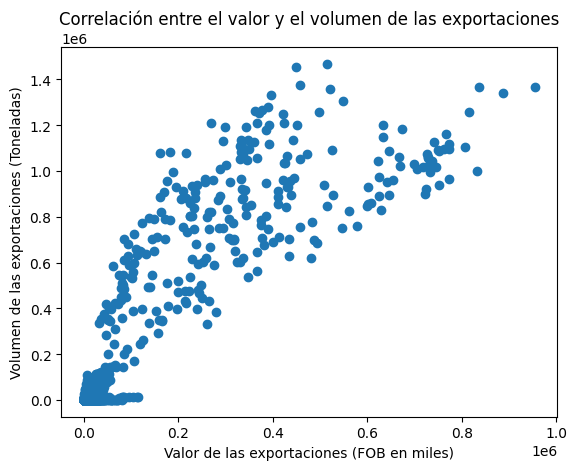

In [ ]:
plt.scatter(df['Export FOB (miles)'], df['Toneladas'])
plt.xlabel('Valor de las exportaciones (FOB en miles)')
plt.ylabel('Volumen de las exportaciones (Toneladas)')
plt.title('Correlación entre el valor y el volumen de las exportaciones')
plt.show()


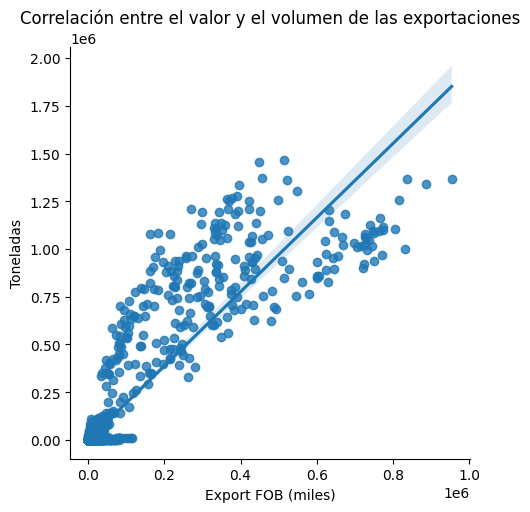

In [ ]:
import seaborn as sns

sns.lmplot(data=df, x='Export FOB (miles)', y='Toneladas')

plt.title('Correlación entre el valor y el volumen de las exportaciones')
plt.show()


 Existe una correlación positiva entre el valor de las exportaciones (FOB en miles) y el volumen de las exportaciones (en toneladas). Esto significa que a medida que el valor de las exportaciones aumenta, el volumen de las exportaciones también tiende a aumentar, y viceversa.

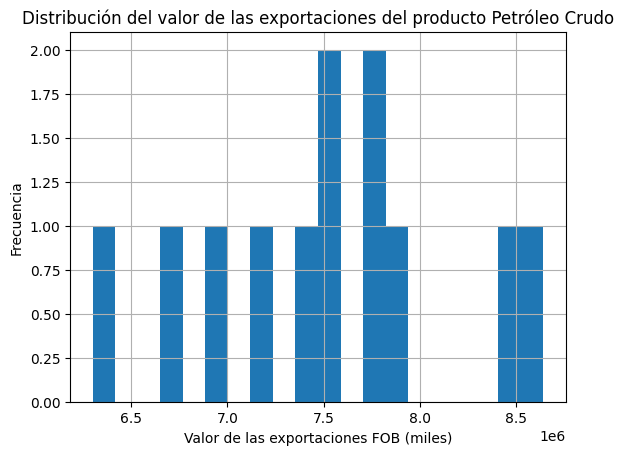

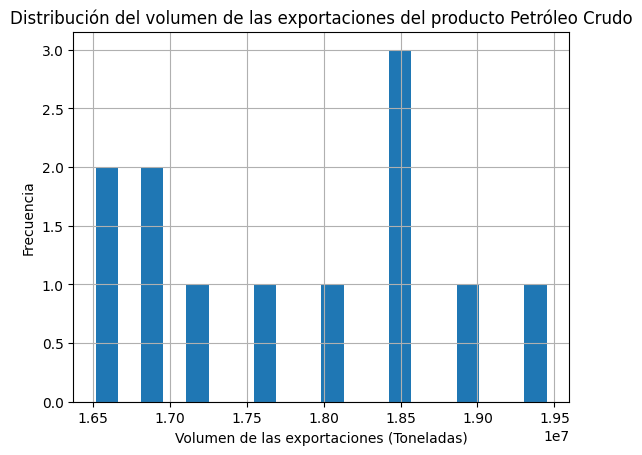

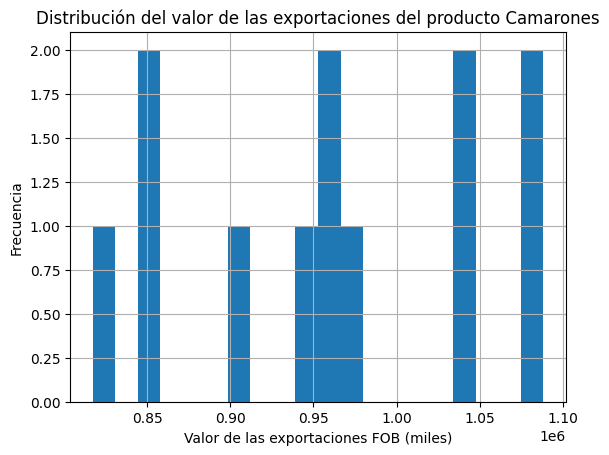

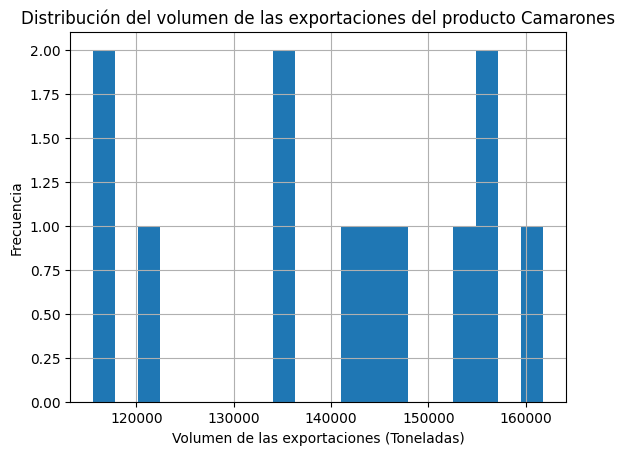

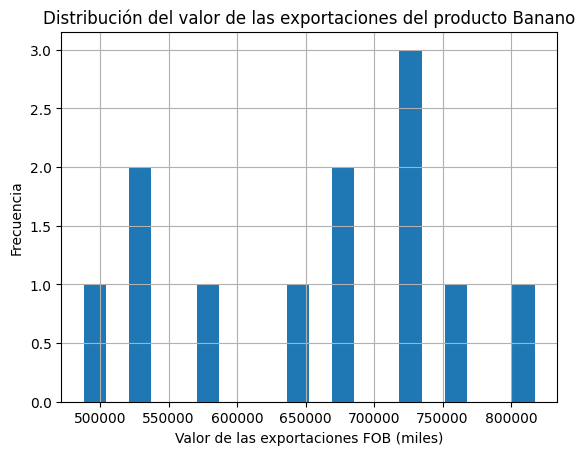

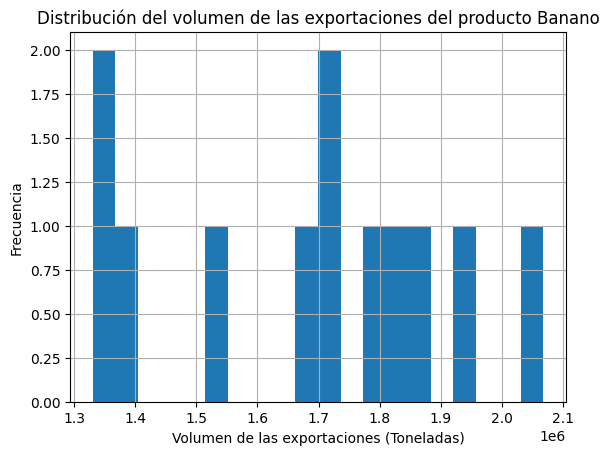

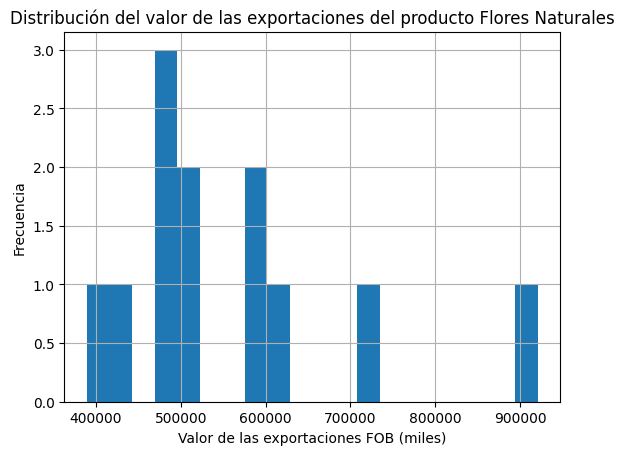

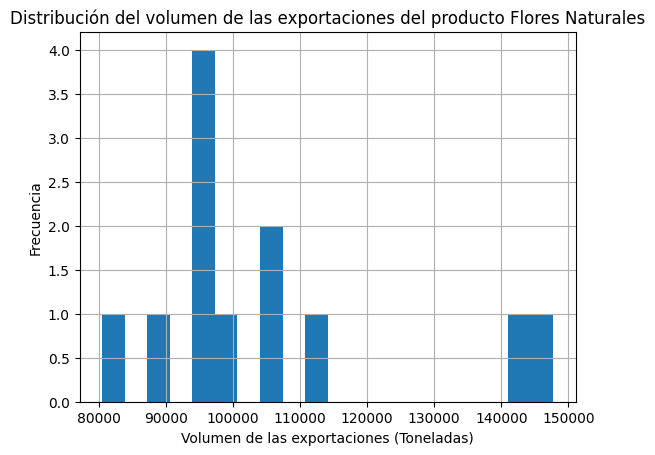

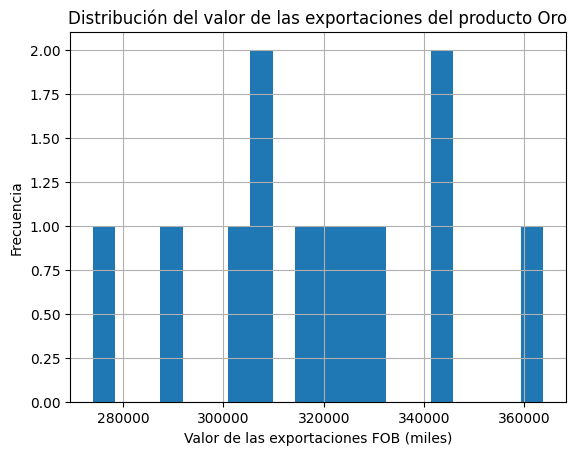

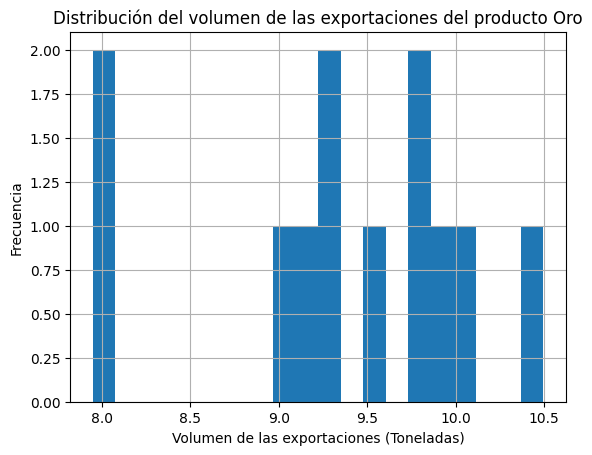

In [ ]:
for producto in top_productos:
    exportaciones_del_producto = exportaciones_por_producto_y_mes.loc[producto]

    # Graficamos la distribución de las exportaciones FOB del producto
    exportaciones_del_producto['Export FOB (miles)'].hist(bins=20)
    plt.title('Distribución del valor de las exportaciones del producto {}'.format(producto))
    plt.xlabel('Valor de las exportaciones FOB (miles)')
    plt.ylabel('Frecuencia')
    plt.show()

    # Graficamos la distribución de las toneladas exportadas del producto
    exportaciones_del_producto['Toneladas'].hist(bins=20)
    plt.title('Distribución del volumen de las exportaciones del producto {}'.format(producto))
    plt.xlabel('Volumen de las exportaciones (Toneladas)')
    plt.ylabel('Frecuencia')
    plt.show()


In [ ]:
# Explora la cantidad de productos exportados cada año
print(df.groupby('Año')['Producto Principal (Nivel 4)'].count())


Año
2001    3647
2002    3629
2003    4390
2004    4881
2005    4652
2006    4539
2007    4242
2008    4467
2009    4891
2010    4653
2011    4709
2012    4804
2013    5492
2014    6117
2015    6209
2016    7004
2017    6445
2018    7021
2019    6200
2020    6114
2021    7781
2022    7632
2023    1894
Name: Producto Principal (Nivel 4), dtype: int64


En conclusion: Podemos observar que en terminos del valor y volumen trancurido el tiempo con la grafica podemos observar que el periodo desde el 2010 hasta el 2014 aproximadamente. Ademas, con la otra grafica observamos que el producto mator vendido es el petrolio crudo.